# 0. Question & Assumptions
### Is there a relationship between the types of MetroCards swiped at a station and the surrounding neighborhoods' demographics (income)?
### Is there a change in types of MetroCards swiped before and after price hikes?

### Assumptions
- Accounts for only 3 types of MetroCards: Full Fare, 7-D Unlimited, 30-D Unlimited (accounts for over 85% of data)
- Assumes swipes at a station are coming from people who live in the surrounding area. If there were ways to filter the information (e.g. only weekday mornings), this would be more accurate.
- Please install uszipcode module using the following command before running notebook:

# 1. DataFrame 1a - Station & Fare Type
Example of Cleaning Data: Load MTA Fare Data - Week of 10/08/2016 (for demo purposes)

In [1]:
import pandas as pd
import thinkplot
import thinkstats2
%matplotlib inline

In [2]:
url = 'http://web.mta.info/developers/data/nyct/fares/fares_161008.csv'
df = pd.read_csv(url)
df.head()

,,FARECARD USAGE BY STATION FOR DATE RANGE:,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,
0,,09/24/2016-09/30/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...
1,REMOTE,STATION,FF,SEN/DIS,7-D AFAS UNL,30-D AFAS/RMF UNL,JOINT RR TKT,7-D UNL,30-D UNL,14-D RFM UNL,...,TCMC ANNUAL MC,MR EZPAY EXP,MR EZPAY UNL,PATH 2-T,AIRTRAIN FF,AIRTRAIN 30-D,AIRTRAIN 10-T,AIRTRAIN MTHLY,STUDENTS,...
2,R001,WHITEHALL STREET,00061962,00002733,00000368,00001058,00000253,00030913,00036403,00000000,...,00004795,00001734,00000599,00000000,00001501,00000000,00000000,00000000,00002914,...
3,R003,CYPRESS HILLS,00003150,00000185,00000022,00000051,00000004,00002829,00001490,00000000,...,00000132,00000019,00000013,00000000,00000036,00000000,00000000,00000000,00000856,...
4,R004,75TH STREET & ELDERTS LANE,00008190,00000482,00000042,00000132,00000004,00006193,00004581,00000000,...,00000315,00000044,00000056,00000000,00000113,00000000,00000000,00000000,00003966,...


## Cleaning Data
### Renaming incorrect column labels & removing columns
Correct values are in row 1. Remove column 25 because it contains no data.

In [3]:
print(df.columns)
df = df.drop(df.columns[25], axis=1)

Index(['     ', 'FARECARD USAGE BY STATION FOR DATE RANGE: ', 'Unnamed: 2',
       'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       '                                                                                                                                                                                                                                                                                                          '],
      dtype='object')


In [4]:
correct_column_values = df.iloc[1] # Row 1
df = df.drop(df.index[[0, 1]]) # Drop rows (old labels)
df.columns = correct_column_values
df.head()

1,REMOTE,STATION,FF,SEN/DIS,7-D AFAS UNL,30-D AFAS/RMF UNL,JOINT RR TKT,7-D UNL,30-D UNL,14-D RFM UNL,...,RR UNL NO TRADE,TCMC ANNUAL MC,MR EZPAY EXP,MR EZPAY UNL,PATH 2-T,AIRTRAIN FF,AIRTRAIN 30-D,AIRTRAIN 10-T,AIRTRAIN MTHLY,STUDENTS
2,R001,WHITEHALL STREET,00061962,00002733,00000368,00001058,00000253,00030913,00036403,00000000,...,00000572,00004795,00001734,00000599,00000000,00001501,00000000,00000000,00000000,00002914
3,R003,CYPRESS HILLS,00003150,00000185,00000022,00000051,00000004,00002829,00001490,00000000,...,00000007,00000132,00000019,00000013,00000000,00000036,00000000,00000000,00000000,00000856
4,R004,75TH STREET & ELDERTS LANE,00008190,00000482,00000042,00000132,00000004,00006193,00004581,00000000,...,00000002,00000315,00000044,00000056,00000000,00000113,00000000,00000000,00000000,00003966
5,R005,85TH STREET & FOREST PKWAY,00009103,00000629,00000040,00000183,00000001,00006517,00005681,00000000,...,00000000,00000376,00000063,00000081,00000000,00000101,00000000,00000000,00000000,00001814
6,R006,WOODHAVEN BOULEVARD,00008973,00000600,00000082,00000228,00000001,00008835,00006359,00000000,...,00000009,00000423,00000092,00000071,00000000,00000075,00000000,00000000,00000000,00001815


### Removing whitespace in data
Notice whitespace in column labels and station names - trim these.

In [5]:
df.columns

Index(['REMOTE', ' STATION', 'FF', 'SEN/DIS', ' 7-D AFAS UNL',
       '30-D AFAS/RMF UNL', 'JOINT RR TKT', '7-D UNL', '30-D UNL',
       '14-D RFM UNL', '1-D UNL', '14-D UNL', '7D-XBUS PASS', 'TCMC',
       'RF 2 TRIP', 'RR UNL NO TRADE', 'TCMC ANNUAL MC', 'MR EZPAY EXP',
       'MR EZPAY UNL', 'PATH 2-T', 'AIRTRAIN FF', 'AIRTRAIN 30-D',
       'AIRTRAIN 10-T', 'AIRTRAIN MTHLY', 'STUDENTS'],
      dtype='object', name=1)

In [6]:
df.rename(columns=lambda s : s.strip(), inplace=True)
df.columns

Index(['REMOTE', 'STATION', 'FF', 'SEN/DIS', '7-D AFAS UNL',
       '30-D AFAS/RMF UNL', 'JOINT RR TKT', '7-D UNL', '30-D UNL',
       '14-D RFM UNL', '1-D UNL', '14-D UNL', '7D-XBUS PASS', 'TCMC',
       'RF 2 TRIP', 'RR UNL NO TRADE', 'TCMC ANNUAL MC', 'MR EZPAY EXP',
       'MR EZPAY UNL', 'PATH 2-T', 'AIRTRAIN FF', 'AIRTRAIN 30-D',
       'AIRTRAIN 10-T', 'AIRTRAIN MTHLY', 'STUDENTS'],
      dtype='object', name=1)

In [7]:
df['STATION'].str.strip()

2                 WHITEHALL STREET
3                    CYPRESS HILLS
4       75TH STREET & ELDERTS LANE
5       85TH STREET & FOREST PKWAY
6              WOODHAVEN BOULEVARD
7                     104TH STREET
8                     111TH STREET
9                     121ST STREET
10        42ND STREET & 8TH AVENUE
11        42ND STREET & 8TH AVENUE
12        34TH STREET & 8TH AVENUE
13        34TH STREET & 8TH AVENUE
14                   FULTON STREET
15                    FIFTH AVENUE
16                LEXINGTON AVENUE
17                LEXINGTON AVENUE
18       ROOSEVELT AVE/JACKSON HTS
19     179TH STREET & HILLSIDE AVE
20       47-50 STREETS/ROCKEFELLER
21        42ND STREET & 6TH AVENUE
22        34TH STREET & 6TH AVENUE
23        34TH STREET & 6TH AVENUE
24               SUTPHIN BOULEVARD
25     JAMAICA CENTER-PARSONS BLVD
26                     WALL STREET
27        FULTON & WILLIAM STREETS
28                      PARK PLACE
29                 CHAMBERS STREET
30        34TH STREE

### Reindexing the DataFrame
The remote code will help us map this DataFrame to the DataFrame with location and demographic information.

In [8]:
df.set_index('REMOTE', inplace=True)

### Removing irrelevant rows
Remove AirTrain, PATH stations and Staten Island Railway stations.

In [9]:
df = df.drop(df.tail(15).index) # AirTrain and PATH stations are last 15 entries
df = df.drop(['R070', 'R165']) # Staten Island Railway stations

### Changing type of series
Values in the DataFrame appear numeric but are actually strings so change to int where appropriate.

In [10]:
x = df.iloc[0]['7-D UNL']
print(x)
type(x)

00030913


str

In [11]:
for x in df.columns[1:]:
    df[x] = pd.to_numeric(df[x], errors='coerce')

df.head()

1,STATION,FF,SEN/DIS,7-D AFAS UNL,30-D AFAS/RMF UNL,JOINT RR TKT,7-D UNL,30-D UNL,14-D RFM UNL,1-D UNL,...,RR UNL NO TRADE,TCMC ANNUAL MC,MR EZPAY EXP,MR EZPAY UNL,PATH 2-T,AIRTRAIN FF,AIRTRAIN 30-D,AIRTRAIN 10-T,AIRTRAIN MTHLY,STUDENTS
REMOTE,,,,,,,,,,,,,,,,,,,,,
R001,WHITEHALL STREET,61962,2733,368,1058,253,30913,36403,0,0,...,572,4795,1734,599,0,1501,0,0,0,2914
R003,CYPRESS HILLS,3150,185,22,51,4,2829,1490,0,0,...,7,132,19,13,0,36,0,0,0,856
R004,75TH STREET & ELDERTS LANE,8190,482,42,132,4,6193,4581,0,0,...,2,315,44,56,0,113,0,0,0,3966
R005,85TH STREET & FOREST PKWAY,9103,629,40,183,1,6517,5681,0,0,...,0,376,63,81,0,101,0,0,0,1814
R006,WOODHAVEN BOULEVARD,8973,600,82,228,1,8835,6359,0,0,...,9,423,92,71,0,75,0,0,0,1815


In [12]:
type(df.iloc[0]['7-D UNL']) # Fixed

numpy.int64

### Removing additional columns
Now that the data is a bit cleaner and easier to work with, we can now see which MetroCard types are obsolete by summing the columns. Remove columns with single digit counts. Obviously we will still have most of our data.

In [13]:
df.sum(numeric_only=True)

1
FF                   12420272
SEN/DIS                839030
7-D AFAS UNL            87374
30-D AFAS/RMF UNL      234659
JOINT RR TKT            51752
7-D UNL               7112512
30-D UNL              9351178
14-D RFM UNL                3
1-D UNL                     2
14-D UNL                    2
7D-XBUS PASS                0
TCMC                   167714
RF 2 TRIP              223573
RR UNL NO TRADE         72625
TCMC ANNUAL MC         865439
MR EZPAY EXP           270033
MR EZPAY UNL           168176
PATH 2-T                    0
AIRTRAIN FF            205363
AIRTRAIN 30-D               0
AIRTRAIN 10-T               5
AIRTRAIN MTHLY              0
STUDENTS              1449076
dtype: int64

In [14]:
# Remove obsolete MetroCard types. Argument 1 in drop means columns (rows would be 0)
df = df.drop(['14-D RFM UNL', '1-D UNL', '14-D UNL', '7D-XBUS PASS', 
              'PATH 2-T', 'AIRTRAIN 30-D', 'AIRTRAIN 10-T', 'AIRTRAIN MTHLY'], 1)
df.head()

1,STATION,FF,SEN/DIS,7-D AFAS UNL,30-D AFAS/RMF UNL,JOINT RR TKT,7-D UNL,30-D UNL,TCMC,RF 2 TRIP,RR UNL NO TRADE,TCMC ANNUAL MC,MR EZPAY EXP,MR EZPAY UNL,AIRTRAIN FF,STUDENTS
REMOTE,,,,,,,,,,,,,,,,
R001,WHITEHALL STREET,61962,2733,368,1058,253,30913,36403,1001,899,572,4795,1734,599,1501,2914
R003,CYPRESS HILLS,3150,185,22,51,4,2829,1490,26,71,7,132,19,13,36,856
R004,75TH STREET & ELDERTS LANE,8190,482,42,132,4,6193,4581,58,218,2,315,44,56,113,3966
R005,85TH STREET & FOREST PKWAY,9103,629,40,183,1,6517,5681,89,275,0,376,63,81,101,1814
R006,WOODHAVEN BOULEVARD,8973,600,82,228,1,8835,6359,97,226,9,423,92,71,75,1815


### Further Simplifications - 3 Types of MetroCards
Removing everything but Full Fare, 7-Day Unlimited and 30-Day Unlimited. Calculate percentage of data left aftewards.
<br>86% is very good considering we took out over 20 MetroCard types.

In [15]:
before = df.sum(numeric_only=True).sum()

In [16]:
df.drop(['SEN/DIS', '7-D AFAS UNL', '30-D AFAS/RMF UNL', 'JOINT RR TKT', 'TCMC',
         'RF 2 TRIP', 'RR UNL NO TRADE', 'MR EZPAY EXP', 'TCMC ANNUAL MC', 'MR EZPAY UNL',
         'AIRTRAIN FF', 'STUDENTS'], 1, inplace=True)

In [17]:
after = df.sum(numeric_only=True).sum()
print(after / before)

0.8617248434131366


In [18]:
df.head()

1,STATION,FF,7-D UNL,30-D UNL
REMOTE,,,,
R001,WHITEHALL STREET,61962,30913,36403
R003,CYPRESS HILLS,3150,2829,1490
R004,75TH STREET & ELDERTS LANE,8190,6193,4581
R005,85TH STREET & FOREST PKWAY,9103,6517,5681
R006,WOODHAVEN BOULEVARD,8973,8835,6359


## All the cleaning in a single function
Added basic exception handling.
<br>*Note part 6 - had to use list comprehension because types of metrocards have changed over time.

In [19]:
import urllib

# Function to clean MTA fare files.
# 1. Corrects column labels
# 2. Removes whitespace from all strings
# 3. Reindex to Remote Code (e.g R001)
# 4. Removes non-subway stations (PATH, SIR)
# 5. Correctly types data - str for Remote Code and Name, int for everything else
# 6. Removes all MetroCards except for Full Fare, 7-Day Unlimited and 30-Day Unlimited
# 
# Comment out sections for your needs if necessary.
# Available from http://web.mta.info/developers/download.html
def read_mta_fare_csv(url):
    try:
        df = pd.read_csv(url)
    except urllib.error.HTTPError as e:
        raise

    # Part 1
    df.drop(df.columns[25], axis=1, inplace=True)
    correct_column_values = df.iloc[1] # Row 1
    df.drop(df.index[[0, 1]], inplace=True) # Drop rows (old labels)
    df.columns = correct_column_values

    # Part 2
    df.rename(columns=lambda s : s.strip(), inplace=True)
    df['STATION'].str.strip()
    
    # Part 3
    df.set_index('REMOTE', inplace=True)
    
    # Part 4
    df = df.drop(df.tail(15).index) # AirTrain and PATH stations are last 15 entries
    df = df.drop(['R070', 'R165']) # Staten Island Railway stations
    
    # Part 5
    for x in df.columns[1:]:
        df[x] = pd.to_numeric(df[x], errors='coerce')
    
    # Part 6
    col = df.columns.tolist()
    keep = ['STATION', 'FF', '7-D UNL', '30-D UNL']
    drop = [val for val in col if val not in keep]
    df.drop(drop, 1, inplace=True)

    return df

# DataFrame 1b - Dates Before and After Price Hikes
Extension of above. Combine multiple weeks and divide into times before and after fare hikes. Source below - 
https://en.wikipedia.org/wiki/New_York_City_transit_fares
<br>Note: Keep in mind that the MTA files reflect data from one week prior.

1. December 30, 2010 - Before: \$2.25 base fare, After: \$2.25 base fare, \$2.50 SingleRide MetroCard ticket fare
<br>Saturday, January 15, 2011 - First file that reflects this change.

2. March 3, 2013 - After: \$2.50 base fare, \$2.75 SingleRide MetroCard ticket fare
<br>Saturday, Mar 9, 2013 - First file that reflects this change.

3. March 22, 2015 - After: \$2.75 base fare, \$3.00 SingleRide MetroCard ticket fare
<br>Saturday, April 04, 2015 - First file that reflects this change.

## Function to aggregate files over a span of time
For every week from start date to end date, attempts to retrieve csv for the week. Adds dataframes using the df.add method.
<br>Throws an exception if start or end date is not a Saturday. Ignore date and continues if csv not found for a particular day.

In [20]:
import urllib
import datetime as dt

# Function to aggregate files over a period of dates
# Note: Ensure start date and end dates are Saturdays!
def aggregate_mta_fares(start_date, end_date):
    # Error Checking
    if (start_date.weekday() != 5) | (end_date.weekday() != 5):
        raise ValueError('Start or End Date not a Saturday!')
    
    base_link = 'http://web.mta.info/developers/data/nyct/fares/fares_'
    one_week = dt.timedelta(weeks=1)
    df = read_mta_fare_csv(base_link + format_date(start_date))
    print('Attempting to Read: ' + str(start_date))
    
    # Copy of Station series needed because the add operation concatenates strings
    stations = df['STATION'].copy()
    start_date = start_date + one_week
    
    while (start_date <= end_date):
        try:
            print('Attempting to Read: ' + str(start_date))
            current_df = read_mta_fare_csv(base_link + format_date(start_date))
            df = df.add(current_df)
            df['STATION'] = stations
            start_date = start_date + one_week
        except urllib.error.HTTPError as e:
            start_date = start_date + one_week
            continue
    
    # Drop NA rows if they exist
    df.dropna(inplace=True)
    
    # Order columns
    cols = ['STATION', 'FF', '7-D UNL', '30-D UNL']
    df = df.ix[:, cols]
    
    # Fix types from float to int
    for x in df.columns[1:]:
        df[x] = df[x].astype(int)
    
    return df

# Converts date into format MTA uses for their files
def format_date(date):
    return str(date)[2:].replace('-', '') + '.csv'

## Generate dataframe for each time period before & after price hike
MTA only has records from mid 2010. Therefore some dataframes are much smaller than others. However, there is still sufficient data (30 weeks is the smallest dataframe).

In [21]:
# Calculate weeks before and after each fare hike (# of files)
diff1 = (dt.date(2011, 1, 8) - dt.date(2010, 6, 12)).days / 7
diff2 = (dt.date(2013, 3, 2) - dt.date(2011, 1, 15)).days / 7
diff3 = (dt.date(2015, 3, 28) - dt.date(2013, 3, 9)).days / 7
diff4 = (dt.date(2016, 10, 15) - dt.date(2015, 4, 4)).days / 7
print(diff1, diff2, diff3, diff4)

30.0 111.0 107.0 80.0


## Important!
Comment out code below if you really want to pull all the data from MTA servers. It takes a few minutes.
Otherwise, just load files from directory.
<br>If you remove the comments, remember to comment out the read_csv part!

In [22]:
'''
price_hike_df1 = aggregate_mta_fares(dt.date(2010, 6, 12), dt.date(2011, 1, 8))
price_hike_df2 = aggregate_mta_fares(dt.date(2011, 1, 15), dt.date(2013, 3, 2))
price_hike_df3 = aggregate_mta_fares(dt.date(2013, 3, 9), dt.date(2015, 3, 28))
price_hike_df4 = aggregate_mta_fares(dt.date(2015, 4, 4), dt.date(2016, 10, 15))
df_dictionary = {'pricehike1':price_hike_df1,
                'pricehike2':price_hike_df2,
                'pricehike3':price_hike_df3,
                'pricehike4':price_hike_df4}

for key, value in df_dictionary.items():
    value.to_csv(key + '_original.csv', index_label=False)
'''

"\nprice_hike_df1 = aggregate_mta_fares(dt.date(2010, 6, 12), dt.date(2011, 1, 8))\nprice_hike_df2 = aggregate_mta_fares(dt.date(2011, 1, 15), dt.date(2013, 3, 2))\nprice_hike_df3 = aggregate_mta_fares(dt.date(2013, 3, 9), dt.date(2015, 3, 28))\nprice_hike_df4 = aggregate_mta_fares(dt.date(2015, 4, 4), dt.date(2016, 10, 15))\ndf_dictionary = {'pricehike1':price_hike_df1,\n                'pricehike2':price_hike_df2,\n                'pricehike3':price_hike_df3,\n                'pricehike4':price_hike_df4}\n\nfor key, value in df_dictionary.items():\n    value.to_csv(key + '_original.csv', index_label=False)\n"

In [23]:
# Comment this code if running commented out code
df_dictionary = {'pricehike1':pd.read_csv('pricehike1_original.csv'),
                'pricehike2':pd.read_csv('pricehike2_original.csv'),
                'pricehike3':pd.read_csv('pricehike3_original.csv'),
                'pricehike4':pd.read_csv('pricehike4_original.csv'),}

# DataFrame 2 - Station & Location
DataFrame to help map station remote code, latitude/longitude to ZIP code.

A lot of credit to chriswhong for manually entering lat/long info for each station by remote code
<br>https://github.com/chriswhong/nycturnstiles
<br>Using this info combined with the uszipcode module, we can use the coordinates to reverse look up the zipcode.

## Cleaning Data
### Dropping & relabeling columns
Set index to be remote code. This will allow me to join the DataFrames later.
<br>Drop irrelevant columns such as Company and Lines. Also, remove PATH and Staten Island Railway stations as before.

In [24]:
geocoded_df = pd.read_csv('nycturnstiles-master/geocoded.csv')
# Columns originally did not have labels
geocoded_df.columns = ['REMOTE', 'UNKNOWN', 'STATION_ALT', 'LINES', 'COMPANY', 'LATITUDE', 'LONGITUDE']

# Set index to remote to match DataFrame 1
geocoded_df.set_index('REMOTE', inplace=True)

# Drop irrelevant columns
geocoded_df.drop(geocoded_df.columns[[0]], axis=1, inplace=True)

# Remove NaN lat/long
nan_mask = geocoded_df['LATITUDE'].isnull()
geocoded_df.drop(geocoded_df[nan_mask].index, inplace=True)
geocoded_df.head()

,STATION_ALT,LINES,COMPANY,LATITUDE,LONGITUDE
REMOTE,,,,,
R544,HARRISON,1,PTH,40.738879,-74.155533
R165,TOMPKINSVILLE,1,SRT,40.636948,-74.074824
R070,ST. GEORGE,1,SRT,40.643738,-74.073622
R070,ST. GEORGE,1,SRT,40.643738,-74.073622
R552,JOURNAL SQUARE,1,PTH,40.732102,-74.063915


In [25]:
# Remove PATH stations and Staten Island Railway stations
path_mask = geocoded_df['COMPANY'] == 'PTH'
geocoded_df.drop(geocoded_df[path_mask].index, inplace=True)
srt_mask = geocoded_df['COMPANY'] == 'SRT'
geocoded_df.drop(geocoded_df[srt_mask].index, inplace=True)

# Drop Lines and Company columns
geocoded_df.drop(geocoded_df.columns[2], axis=1, inplace=True)
geocoded_df.head()

,STATION_ALT,LINES,LATITUDE,LONGITUDE
REMOTE,,,,
R216,BAY RIDGE-95 ST,R,40.616624,-74.030964
R216,BAY RIDGE-95 ST,R,40.616624,-74.030964
R215,86 ST,R,40.622715,-74.028368
R215,86 ST,R,40.622715,-74.028368
R214,77 ST,R,40.629702,-74.025514


In [26]:
print('Before:', geocoded_df.shape)
geocoded_df.drop_duplicates(inplace=True)
print('After:', geocoded_df.shape)

Before: (737, 4)
After: (467, 4)


In [27]:
geocoded_df.to_csv('geocoded-modified.csv', index_label=False)

### Using 'uszipcode' module to lookup ZIP code from lat/long
Reverse lookup using coordinates and add as new column.
<br>https://pypi.python.org/pypi/uszipcode

## Important!
This section is commented out in case running environment does not have uszipcode installed. 
<br>If you remove the comments to run the code, remember to comment out the read_csv part!

In [28]:
from uszipcode import ZipcodeSearchEngine

In [29]:

search = ZipcodeSearchEngine()
zip_codes = []

# Reverse lookup each station and append to list
for station in geocoded_df.itertuples():
    zip_code = search.by_coordinate(station.LATITUDE, station.LONGITUDE, radius=5, returns=1) # returns list
    zip_codes.append(zip_code[0].Zipcode) # Get closest ZIP code
    
# Add list as new column
geocoded_df['ZIP_CODE'] = zip_codes

# Save for future use
geocoded_df.to_csv('geocoded-modified.csv', index_label=False)


In [30]:
# Comment this code if running commented out code
geocoded_df = pd.read_csv('geocoded-modified.csv')

In [31]:
geocoded_df.head()

,STATION_ALT,LINES,LATITUDE,LONGITUDE,ZIP_CODE
R216,BAY RIDGE-95 ST,R,40.616624,-74.030964,11209
R215,86 ST,R,40.622715,-74.028368,11209
R214,77 ST,R,40.629702,-74.025514,11209
R213,BAY RIDGE AVE,R,40.634945,-74.023411,11220
R212,59 ST,NR,40.641426,-74.017972,11220


# Joining DataFrames 1 and 2
Join DataFrame with MetroCard type data with lat/long/ZIP code data. The join operation behaves like taking the union of two DataFrames. It lines up the indicies (remote code) and then adds the joining DataFrames' columns. If an index does not have column data from the other DataFrame, those values become NaNs.

In [32]:
df_with_zip = geocoded_df.join(df)
df_with_zip.head()

,STATION_ALT,LINES,LATITUDE,LONGITUDE,ZIP_CODE,STATION,FF,7-D UNL,30-D UNL
R001,WHITEHALL ST,R1,40.703082,-74.012983,10004,WHITEHALL STREET,61962.0,30913.0,36403.0
R001,SOUTH FERRY,R1,40.703082,-74.012983,10004,WHITEHALL STREET,61962.0,30913.0,36403.0
R002,FULTON ST,ACJZ2345,40.709938,-74.007983,10007,NaN,NaN,NaN,NaN
R003,CYPRESS HILLS,J,40.689945,-73.872564,11421,CYPRESS HILLS,3150.0,2829.0,1490.0
R004,ELDERTS LANE,JZ,40.691320,-73.867135,11421,75TH STREET & ELDERTS LANE,8190.0,6193.0,4581.0


In [33]:
# Join operation - returns the union
print(df.shape)
print(geocoded_df.shape)
print(df_with_zip.shape)

(449, 4)
(467, 5)
(467, 9)


In [34]:
# Drop entries with NaNs
df_with_zip = df_with_zip[pd.notnull(df_with_zip['FF'])]
print(df_with_zip.shape)

(459, 9)


In [35]:
df_with_zip.head()

,STATION_ALT,LINES,LATITUDE,LONGITUDE,ZIP_CODE,STATION,FF,7-D UNL,30-D UNL
R001,WHITEHALL ST,R1,40.703082,-74.012983,10004,WHITEHALL STREET,61962.0,30913.0,36403.0
R001,SOUTH FERRY,R1,40.703082,-74.012983,10004,WHITEHALL STREET,61962.0,30913.0,36403.0
R003,CYPRESS HILLS,J,40.689945,-73.872564,11421,CYPRESS HILLS,3150.0,2829.0,1490.0
R004,ELDERTS LANE,JZ,40.691320,-73.867135,11421,75TH STREET & ELDERTS LANE,8190.0,6193.0,4581.0
R005,FOREST PARKWAY,J,40.692304,-73.860151,11421,85TH STREET & FOREST PKWAY,9103.0,6517.0,5681.0


### Removing duplicate values
Pandas does not have an operation to remove duplicates by index so create another column (temporarily) with index values. Then drop duplicates using that column. Afterwards, delete the column. 
<br>_Note: Duplicates appear because some stations have more than one name. Every dataset used a different notation._

In [36]:
df_with_zip['REMOTE'] = df_with_zip.index
df_with_zip.drop_duplicates(subset=['REMOTE'], inplace=True)
print(df_with_zip.shape)

(436, 10)


In [37]:
# Remove temoporary column
df_with_zip.drop('REMOTE', axis=1, inplace=True)

In [38]:
# Rearrange columns
cols = ['STATION', 'LINES', 'LATITUDE', 'LONGITUDE', 'ZIP_CODE', 'FF', '7-D UNL', '30-D UNL']
df_with_zip = df_with_zip.ix[:, cols]
df_with_zip.head()

,STATION,LINES,LATITUDE,LONGITUDE,ZIP_CODE,FF,7-D UNL,30-D UNL
R001,WHITEHALL STREET,R1,40.703082,-74.012983,10004,61962.0,30913.0,36403.0
R003,CYPRESS HILLS,J,40.689945,-73.872564,11421,3150.0,2829.0,1490.0
R004,75TH STREET & ELDERTS LANE,JZ,40.691320,-73.867135,11421,8190.0,6193.0,4581.0
R005,85TH STREET & FOREST PKWAY,J,40.692304,-73.860151,11421,9103.0,6517.0,5681.0
R006,WOODHAVEN BOULEVARD,JZ,40.693866,-73.851568,11421,8973.0,8835.0,6359.0


### Converting back to original types
Happens with every merge/join/concat operation.

In [39]:
df_with_zip.dtypes

STATION       object
LINES         object
LATITUDE     float64
LONGITUDE    float64
ZIP_CODE       int64
FF           float64
7-D UNL      float64
30-D UNL     float64
dtype: object

In [40]:
# Convert appropriate columns from float to int
for key in df_with_zip.columns[4:]:
    df_with_zip[key] = df_with_zip[key].astype(int)

In [41]:
df_with_zip.dtypes

STATION       object
LINES         object
LATITUDE     float64
LONGITUDE    float64
ZIP_CODE       int64
FF             int64
7-D UNL        int64
30-D UNL       int64
dtype: object

### Apply to our dataframe dictionary
Function of above process.

In [42]:
# Function to add lat, long, ZIP code to a given dataframe with swipe information.
# Joins by remote code index.
def add_location_info(df):
    # Read location info
    geocoded_df = pd.read_csv('geocoded-modified.csv')
    
    # Union join
    df_with_zip = geocoded_df.join(df)
    
    # Drop entries with NaNs
    df_with_zip = df_with_zip[pd.notnull(df_with_zip['FF'])]
    
    # Add temporary column. Pandas does not support droping duplicates by index
    df_with_zip['REMOTE'] = df_with_zip.index
    df_with_zip.drop_duplicates(subset=['REMOTE'], inplace=True)
    
    # Remove temoporary column
    df_with_zip.drop('REMOTE', axis=1, inplace=True)
    
    # Rearrange columns
    cols = ['STATION', 'LINES', 'LATITUDE', 'LONGITUDE', 'ZIP_CODE', 'FF', '7-D UNL', '30-D UNL']
    df_with_zip = df_with_zip.ix[:, cols]
    
    # Convert appropriate columns from float to int
    for key in df_with_zip.columns[4:]:
        df_with_zip[key] = df_with_zip[key].astype(int)
    
    return df_with_zip

In [43]:
for key, value in df_dictionary.items():
    df_dictionary[key] = add_location_info(value)

In [44]:
df_dictionary['pricehike1'].head()

,STATION,LINES,LATITUDE,LONGITUDE,ZIP_CODE,FF,7-D UNL,30-D UNL
R001,WHITEHALL STREET,R1,40.703082,-74.012983,10004,1930648,578586,1134069
R002,FULTON ST & BROADWAY NASSAU,ACJZ2345,40.709938,-74.007983,10007,530327,119782,363916
R003,CYPRESS HILLS,J,40.689945,-73.872564,11421,105527,46312,41443
R004,75TH STREET & ELDERTS LANE,JZ,40.691320,-73.867135,11421,254372,92043,135913
R005,85TH STREET & FOREST PKWAY,J,40.692304,-73.860151,11421,283449,92143,169389


# DataFrame 3 - ZIP Code and Income
Measure is median household income. Median chosen over mean because income is a statistic where the mean can be easily skewed by extremely high figures. Household income chosen over family income to include those not in families or living with others.

Dataset downloaded from the Census (via American FactFinder)
<br>https://factfinder.census.gov/faces/nav/jsf/pages/index.xhtml
### American Community Survey (2014 5-year estimates)
Use this information to append to the joined DataFrame(1&2). Append by ZIP code.

In [45]:
income_df = pd.read_csv('ACS_14_5YR_S1901/ACS_14_5YR_S1901_with_ann.csv')
income_df.drop(income_df.columns[4:], axis=1, inplace=True)

### Ensure all three GEO labels mean the same thing
Then we know it is safe to drop two of them.

In [46]:
count = 0
for x in income_df.values:
    if (x[0][-5:] == x[1] == x[2][-5:]):
        count += 1

print(income_df.shape)
print(count)
income_df.drop(income_df.columns[[0, 2]], axis=1, inplace=True)

(1795, 4)
1794


In [47]:
income_df.rename(columns={'GEO.id2':'ZIP_CODE', 'HC01_EST_VC13':'INCOME'}, inplace=True)
income_df.drop(0, inplace=True) # Drop extra labels (first row)

### Changing type of series
Like previous DataFrames, numeric data encoded as strings. Change to numeric where applicable.
<br>Income values were strings (including values such as '250,000+'). Remove characters and then change to numeric.

In [48]:
income_df['INCOME'] = income_df['INCOME'].apply(lambda x : x.replace('+', ''))
income_df['INCOME'] = income_df['INCOME'].apply(lambda x : x.replace(',', ''))
income_df['INCOME'] = income_df['INCOME'].apply(lambda x : int(x.replace('-', '0')))

In [49]:
for x in income_df.columns:
    income_df[x] = pd.to_numeric(income_df[x], errors='ignore')

income_df.dtypes

ZIP_CODE    int64
INCOME      int64
dtype: object

# Joining DataFrames 1, 2, 3
Complete DataFrame with Station Info (Lat/Long/ZIP), MetroCard type data, and racial data given the ZIP code.
<br>In merge function, 'on' paramater refers to column to join on, and 'inner' parameter tells the function to take intersection of the two DataFrames.

In [50]:
df_complete = df_with_zip.reset_index().merge(income_df, on='ZIP_CODE', how='inner').set_index('index')

In [51]:
print(df_with_zip.shape)
print(income_df.shape)
print(df_complete.shape)

(436, 8)
(1794, 2)
(436, 9)


In [52]:
df_complete.head()

,STATION,LINES,LATITUDE,LONGITUDE,ZIP_CODE,FF,7-D UNL,30-D UNL,INCOME
index,,,,,,,,,
R001,WHITEHALL STREET,R1,40.703082,-74.012983,10004,61962,30913,36403,123409
R041,BOWLING GREEN & BATTERY PL,45,40.704782,-74.014099,10004,52062,23440,37118,123409
R003,CYPRESS HILLS,J,40.689945,-73.872564,11421,3150,2829,1490,61974
R004,75TH STREET & ELDERTS LANE,JZ,40.691320,-73.867135,11421,8190,6193,4581,61974
R005,85TH STREET & FOREST PKWAY,J,40.692304,-73.860151,11421,9103,6517,5681,61974


### Same with our df_dictionary

In [53]:
for key, value in df_dictionary.items():
    df_dictionary[key] = value.reset_index().merge(income_df, on='ZIP_CODE', how='inner').set_index('index')

I realized late that some of the income values are 0 (assuming information not available). Remove these.

In [54]:
for key, value in df_dictionary.items():
    df_dictionary[key] = value[value['INCOME'] != 0]

### Generating additional columns
Add a % of station swipes column for each MetroCard. This allows us to compare stations in a more practical way.
Apply function below to our df_dictionary.

In [55]:
# Function that adds columns that show % of swipes at a station
def add_percentage_info(df):
    df['FF_PCT'] = df['FF'] / (df['FF'] + df['7-D UNL'] + df['30-D UNL'])
    df['7-D UNL_PCT'] = df['7-D UNL'] / (df['FF'] + df['7-D UNL'] + df['30-D UNL'])
    df['30-D UNL_PCT'] = df['30-D UNL'] / (df['FF'] + df['7-D UNL'] + df['30-D UNL'])
    
    return df

In [56]:
for key, value in df_dictionary.items():
    df_dictionary[key] = add_percentage_info(value)

In [57]:
df_dictionary[key].head()

,STATION,LINES,LATITUDE,LONGITUDE,ZIP_CODE,FF,7-D UNL,30-D UNL,INCOME,FF_PCT,7-D UNL_PCT,30-D UNL_PCT
index,,,,,,,,,,,,
R001,WHITEHALL STREET,R1,40.703082,-74.012983,10004,1930648,578586,1134069,123409,0.529917,0.158808,0.311275
R041,BOWLING GREEN & BATTERY PL,45,40.704782,-74.014099,10004,1313498,375262,931003,123409,0.501380,0.143243,0.355377
R002,FULTON ST & BROADWAY NASSAU,ACJZ2345,40.709938,-74.007983,10007,530327,119782,363916,250000,0.522992,0.118125,0.358883
R014,FULTON STREET,2345ACJZ,40.709938,-74.007983,10007,2668771,586067,1834044,250000,0.524432,0.115166,0.360402
R029,PARK PLACE,23ACE,40.712557,-74.009807,10007,4131443,745824,2325399,250000,0.573599,0.103548,0.322853


In [58]:
# Save for future
for key, value in df_dictionary.items():
    #value.rename(columns={'7-D UNL':'7D_UNL', '30-D UNL':'30D_UNL', '7-D UNL_PCT':'7D_UNL_PCT', '30-D UNL_PCT':'30D_UNL_PCT'}, inplace=True)
    value.to_csv(key + '_final.csv', index_label=False)

### Final Product

In [59]:
df_dictionary['pricehike1']

,STATION,LINES,LATITUDE,LONGITUDE,ZIP_CODE,FF,7-D UNL,30-D UNL,INCOME,FF_PCT,7-D UNL_PCT,30-D UNL_PCT
index,,,,,,,,,,,,
R001,WHITEHALL STREET,R1,40.703082,-74.012983,10004,1930648,578586,1134069,123409,0.529917,0.158808,0.311275
R041,BOWLING GREEN & BATTERY PL,45,40.704782,-74.014099,10004,1313498,375262,931003,123409,0.501380,0.143243,0.355377
R002,FULTON ST & BROADWAY NASSAU,ACJZ2345,40.709938,-74.007983,10007,530327,119782,363916,250000,0.522992,0.118125,0.358883
R014,FULTON STREET,2345ACJZ,40.709938,-74.007983,10007,2668771,586067,1834044,250000,0.524432,0.115166,0.360402
R029,PARK PLACE,23ACE,40.712557,-74.009807,10007,4131443,745824,2325399,250000,0.573599,0.103548,0.322853
R030,CHAMBERS STREET,123,40.715436,-74.009335,10007,1470364,354868,1134800,250000,0.496739,0.119887,0.383374
R087,CITY HALL,R,40.713086,-74.007232,10007,675328,143463,520529,250000,0.504232,0.107116,0.388652
R003,CYPRESS HILLS,J,40.689945,-73.872564,11421,105527,46312,41443,61974,0.545974,0.239608,0.214417
R004,75TH STREET & ELDERTS LANE,JZ,40.691320,-73.867135,11421,254372,92043,135913,61974,0.527384,0.190831,0.281785


# Histograms
## Full Fare MetroCards
Default bins of 10 too small. There are also extremes values to the right.

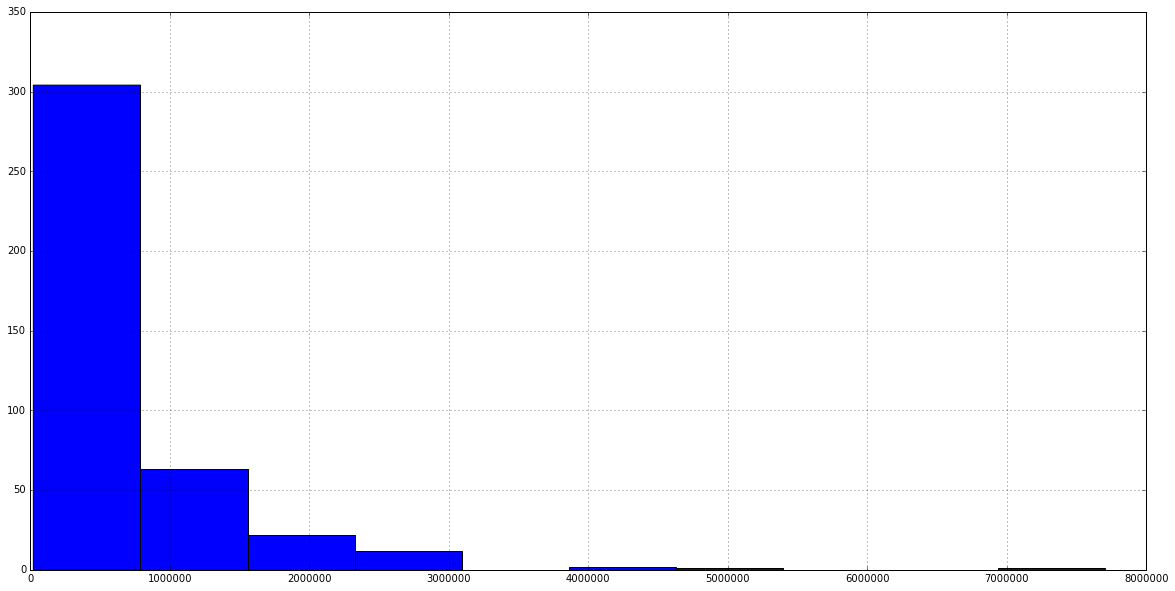

In [60]:
df_dictionary['pricehike1']['FF'].hist(bins=10, figsize=(20,10))

Too many bins (50) now. But looks better.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a0701d0>]], dtype=object)

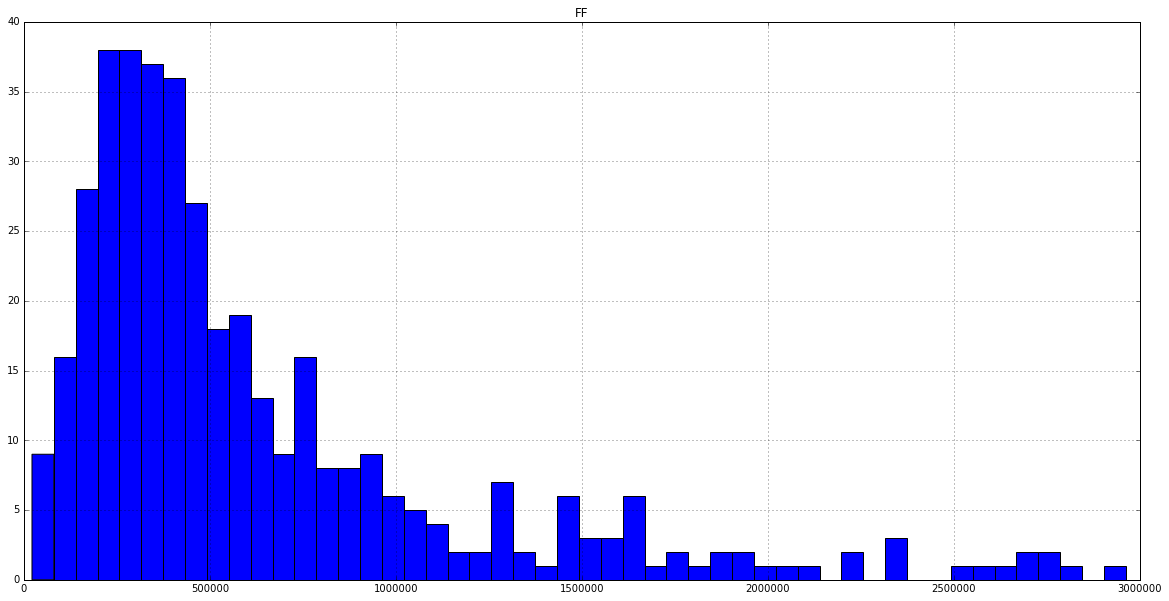

In [61]:
mask = df_dictionary['pricehike1']['FF'] < 3000000
df_dictionary['pricehike1'][mask].hist('FF', bins=50, figsize=(20,10))

20 bins seems pretty good.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11aa71c50>]], dtype=object)

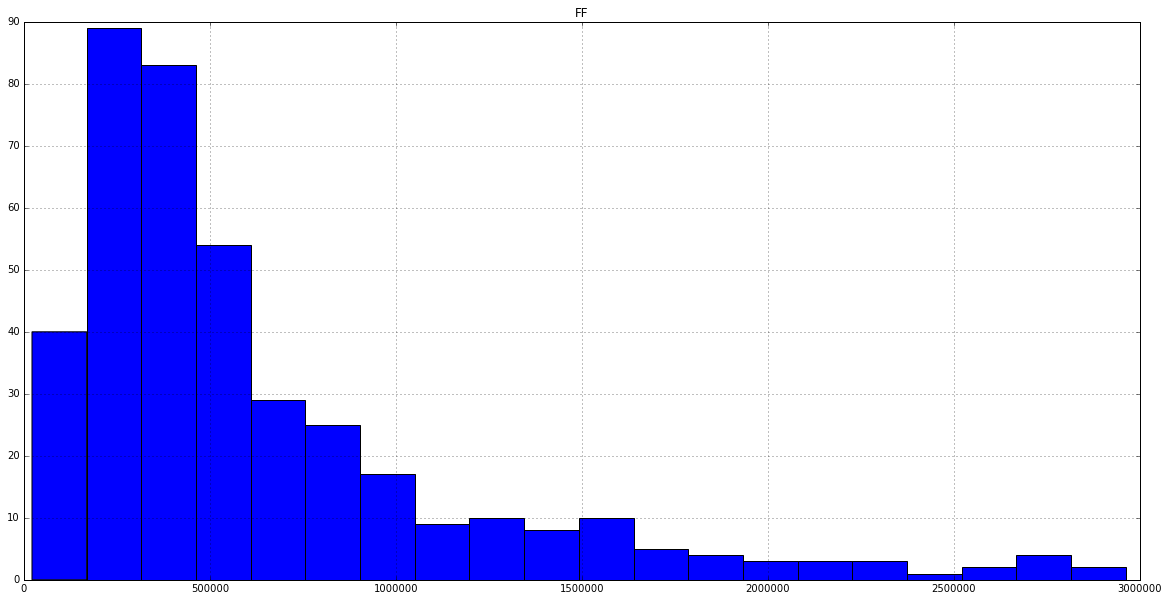

In [62]:
df_dictionary['pricehike1'][mask].hist('FF', bins=20, figsize=(20,10))

### Which stations have the highest number of Full Fare swipes?

In [63]:
df_dictionary['pricehike1'].loc[~mask]

,STATION,LINES,LATITUDE,LONGITUDE,ZIP_CODE,FF,7-D UNL,30-D UNL,INCOME,FF_PCT,7-D UNL_PCT,30-D UNL_PCT
index,,,,,,,,,,,,
R029,PARK PLACE,23ACE,40.712557,-74.009807,10007,4131443,745824,2325399,250000,0.573599,0.103548,0.322853
R084,59TH STREET/COLUMBUS CIRCLE,1ABCD,40.768110,-73.981891,10019,4998541,1452087,3878056,90174,0.483948,0.140588,0.375465
R170,14TH STREET-UNION SQUARE,LNQR456,40.734836,-73.990688,10003,7702585,2328958,7496487,97524,0.439444,0.132870,0.427686
R179,86TH STREET-LEXINGTON AVE,456,40.779485,-73.955541,10028,4247268,1194895,4065231,115485,0.446733,0.125681,0.427586


### Same as above with 7-D Unlimited

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10aee8128>]], dtype=object)

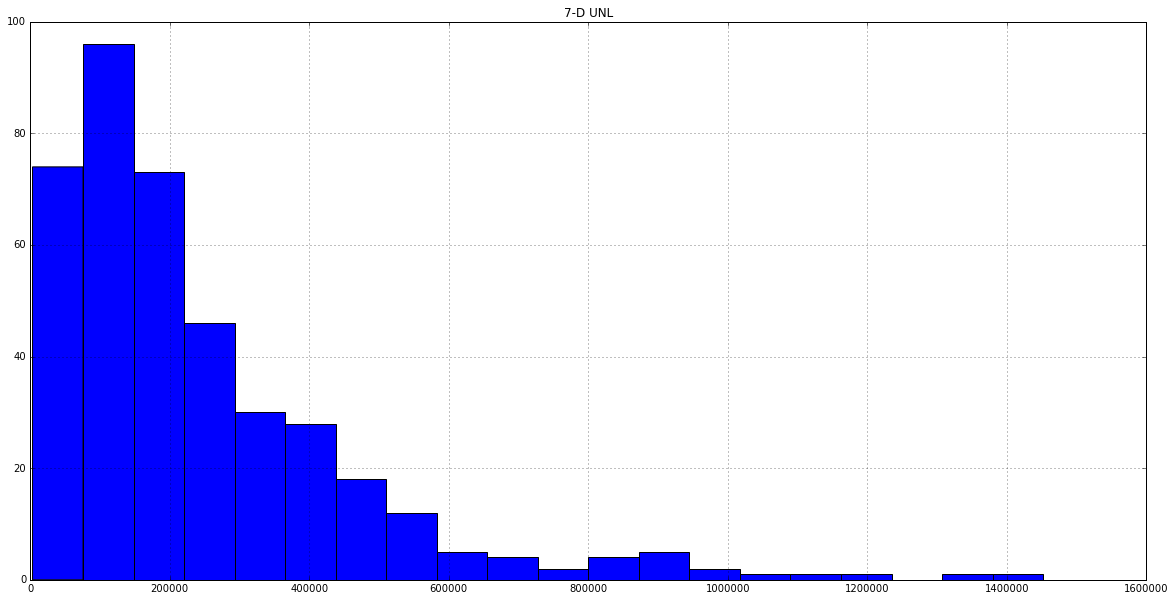

In [64]:
mask = df_dictionary['pricehike1']['7-D UNL'] < 1500000
df_dictionary['pricehike1'][mask].hist('7-D UNL', bins=20, figsize=(20,10))

In [65]:
df_dictionary['pricehike1'].loc[~mask]

,STATION,LINES,LATITUDE,LONGITUDE,ZIP_CODE,FF,7-D UNL,30-D UNL,INCOME,FF_PCT,7-D UNL_PCT,30-D UNL_PCT
index,,,,,,,,,,,,
R170,14TH STREET-UNION SQUARE,LNQR456,40.734836,-73.990688,10003,7702585,2328958,7496487,97524,0.439444,0.13287,0.427686


### Same as above with 7-D Unlimited

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10aefe2e8>]], dtype=object)

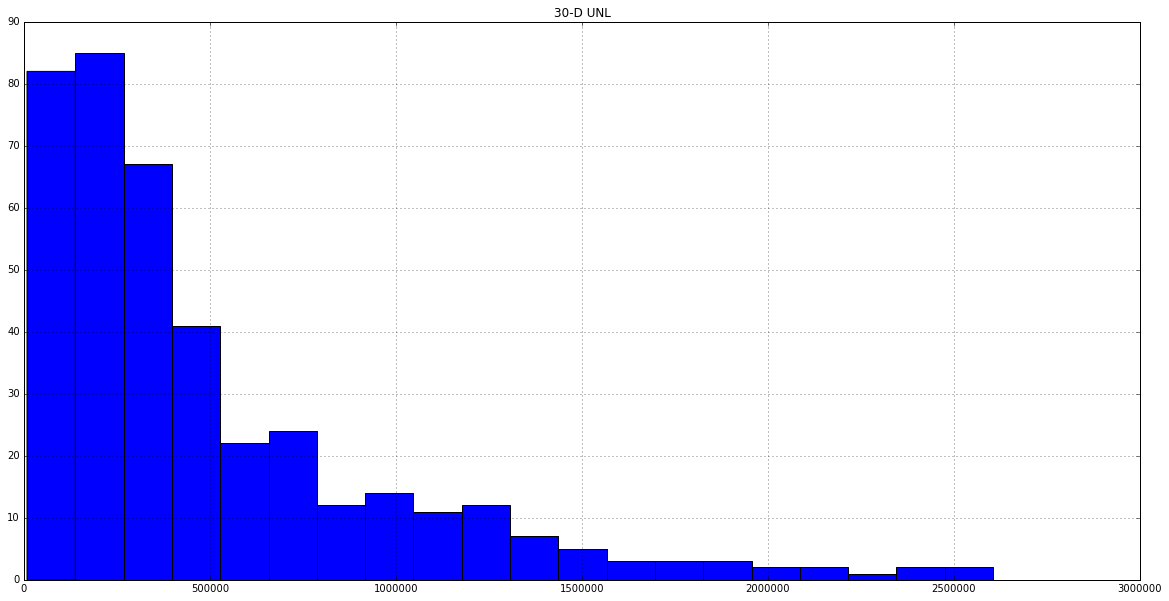

In [66]:
mask = df_dictionary['pricehike1']['30-D UNL'] < 3000000
df_dictionary['pricehike1'][mask].hist('30-D UNL', bins=20, figsize=(20,10))

In [67]:
df_dictionary['pricehike1'].loc[~mask]

,STATION,LINES,LATITUDE,LONGITUDE,ZIP_CODE,FF,7-D UNL,30-D UNL,INCOME,FF_PCT,7-D UNL_PCT,30-D UNL_PCT
index,,,,,,,,,,,,
R018,ROOSEVELT AVE/JACKSON HTS,EFMR7,40.746655,-73.891361,11372,2826797,1324128,3680517,46402,0.360955,0.169078,0.469967
R055,MAIN STREET,7,40.759578,-73.830056,11354,2758090,1074595,3920605,46650,0.355732,0.138599,0.505670
R084,59TH STREET/COLUMBUS CIRCLE,1ABCD,40.768110,-73.981891,10019,4998541,1452087,3878056,90174,0.483948,0.140588,0.375465
R170,14TH STREET-UNION SQUARE,LNQR456,40.734836,-73.990688,10003,7702585,2328958,7496487,97524,0.439444,0.132870,0.427686
R179,86TH STREET-LEXINGTON AVE,456,40.779485,-73.955541,10028,4247268,1194895,4065231,115485,0.446733,0.125681,0.427586


Overall, big stations such as Union Square stand out and have the highest number of swipes for all three types of cards. However, these histograms don't give much information besides basic counts.

## % Swipe Histograms
This time, take the % of swipes as opposed to just the count.

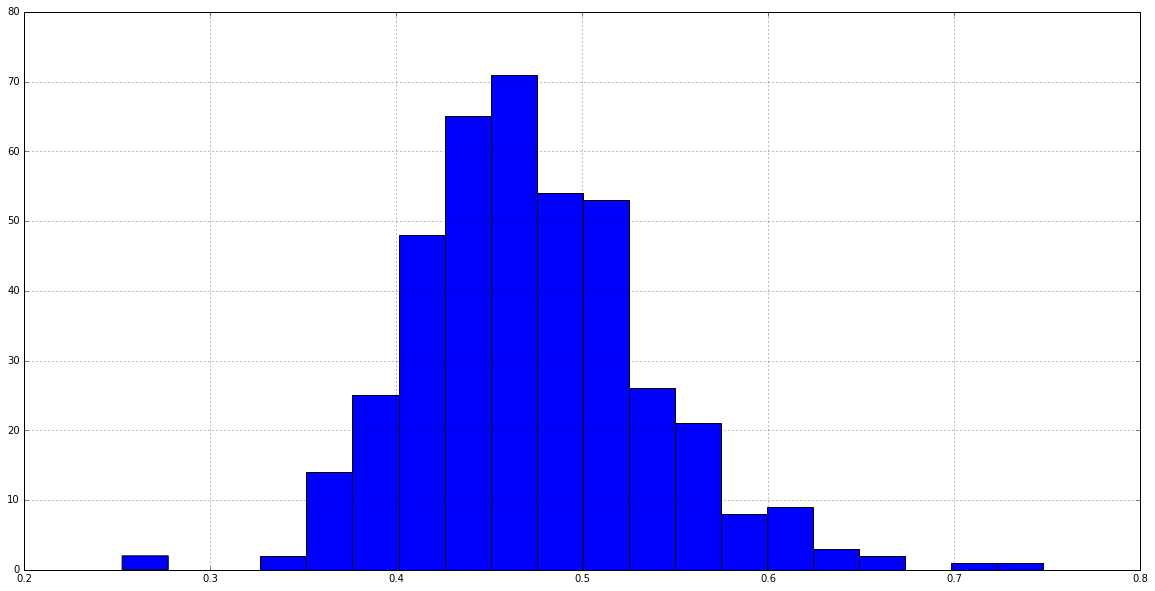

In [68]:
df_dictionary['pricehike1']['FF_PCT'].hist(bins=20, figsize=(20,10))

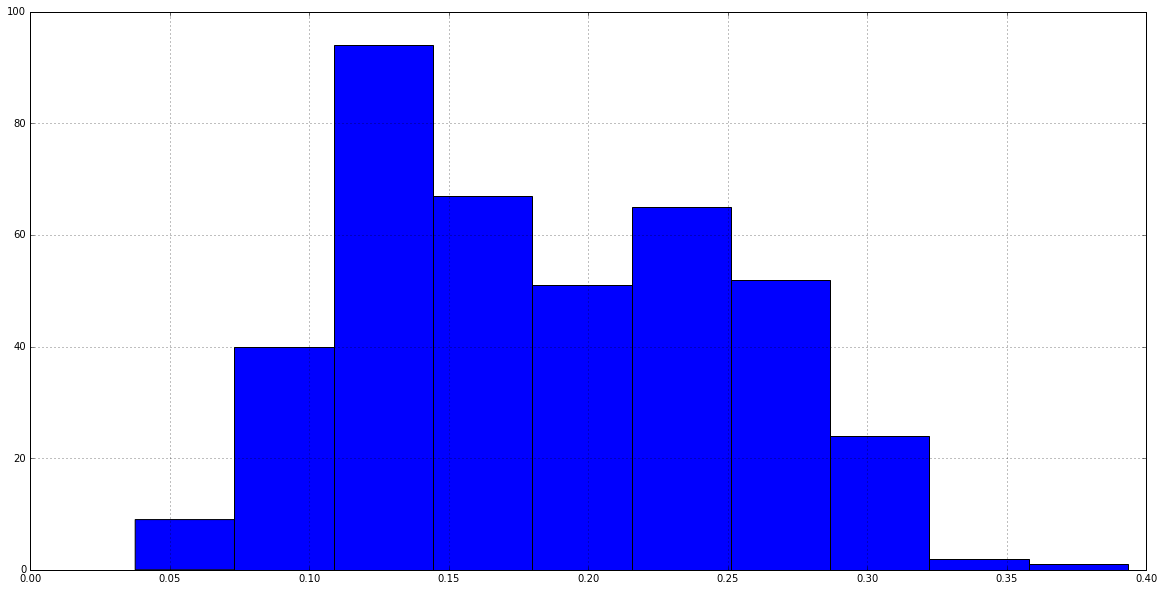

In [69]:
df_dictionary['pricehike1']['7-D UNL_PCT'].hist(bins=10, figsize=(20,10))

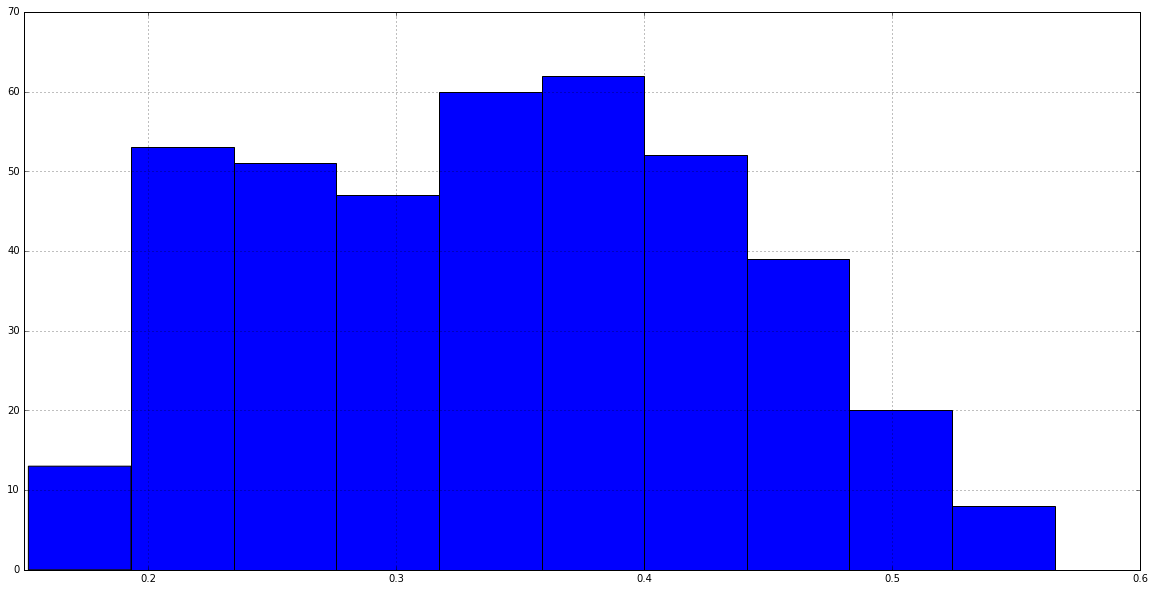

In [70]:
df_dictionary['pricehike1']['30-D UNL_PCT'].hist(bins=10, figsize=(20,10))

These histograms are slightly more interesting - the Full Fare % histogram seems to have a normal distribution with a heavier right tail. However, the 7-D unlimited and 30-D unlimited cards don't seem to have any sort of pattern.

# CDFs
Overall, the above graphs don't reveal that much information. It would be more useful to compare CDFs. In order to compare CDF graphs, it makes more sense to plot percentages of FF, 7-D and 30-D cards.

### % Full Fare swipes for each time period

<br>pricehike1 - Before Dec 30, 2010 Price Hike
<br>pricehike2 - Before Mar 3, 2013 Price Hike
<br>pricehike3 - Before Mar 22, 2015 Price Hike
<br>pricehike4 - Until today (or next price hike)

% Full Fare CDFs for pricehike4


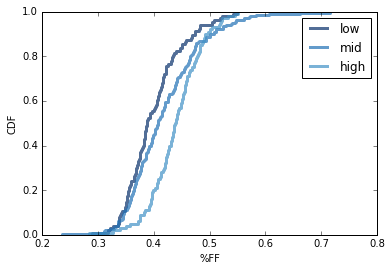

% Full Fare CDFs for pricehike2


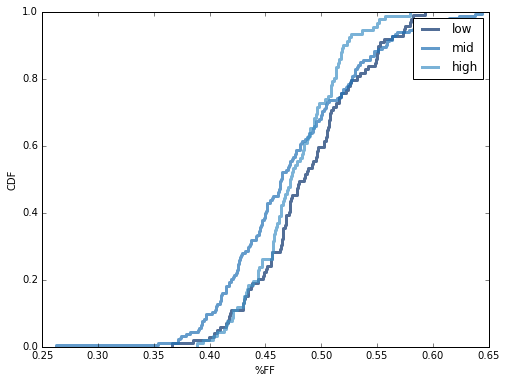

% Full Fare CDFs for pricehike3


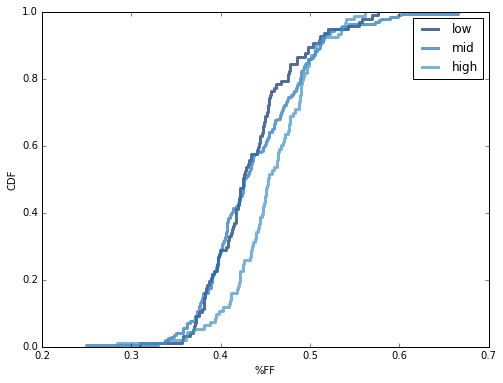

% Full Fare CDFs for pricehike1


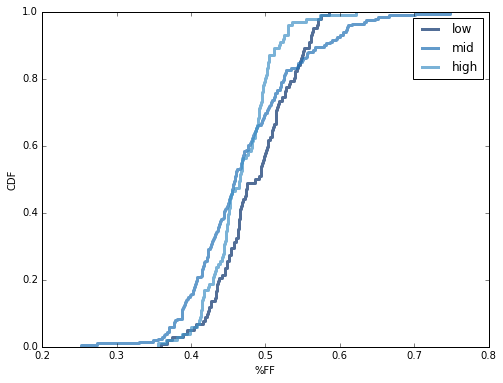

In [71]:
for key, df in df_dictionary.items():
    print('% Full Fare CDFs for', key)
    bottom_quartile = df['INCOME'].quantile(.25)
    upper_quartile = df['INCOME'].quantile(.75)
    low_income_mask = df['INCOME'] <= bottom_quartile
    middle_income_mask = (df['INCOME'] > bottom_quartile) & (df['INCOME'] <= upper_quartile)
    high_income_mask = df['INCOME'] > upper_quartile
    
    low_income_cdf = thinkstats2.Cdf(df.loc[low_income_mask]['FF_PCT'], label='low')
    middle_income_cdf = thinkstats2.Cdf(df.loc[middle_income_mask]['FF_PCT'], label='mid')
    high_income_cdf = thinkstats2.Cdf(df.loc[high_income_mask]['FF_PCT'], label='high')
    
    thinkplot.PrePlot(3)
    thinkplot.Cdfs([low_income_cdf, middle_income_cdf, high_income_cdf])
    thinkplot.Show(xlabel='%FF', ylabel='CDF')

### % 7-Day Unlimited swipes for each time period

<br>pricehike1 - Before Dec 30, 2010 Price Hike
<br>pricehike2 - Before Mar 3, 2013 Price Hike
<br>pricehike3 - Before Mar 22, 2015 Price Hike
<br>pricehike4 - Until today (or next price hike)

% 7-D Unlimited CDFs for pricehike4


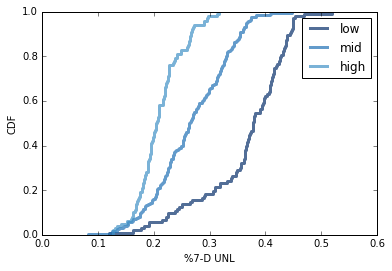

% 7-D Unlimited CDFs for pricehike2


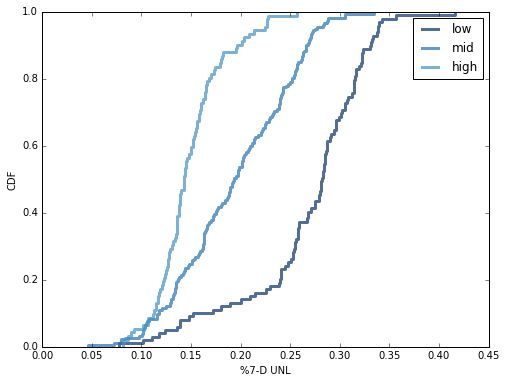

% 7-D Unlimited CDFs for pricehike3


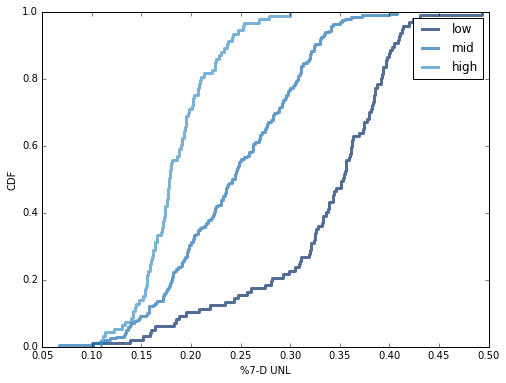

% 7-D Unlimited CDFs for pricehike1


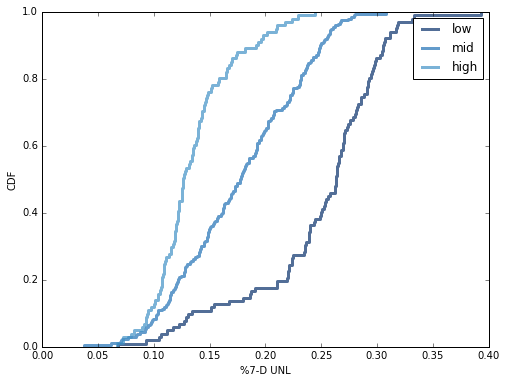

In [72]:
for key, df in df_dictionary.items():
    print('% 7-D Unlimited CDFs for', key)
    bottom_quartile = df['INCOME'].quantile(.25)
    upper_quartile = df['INCOME'].quantile(.75)
    low_income_mask = df['INCOME'] <= bottom_quartile
    middle_income_mask = (df['INCOME'] > bottom_quartile) & (df['INCOME'] <= upper_quartile)
    high_income_mask = df['INCOME'] > upper_quartile
    
    low_income_cdf = thinkstats2.Cdf(df.loc[low_income_mask]['7-D UNL_PCT'], label='low')
    middle_income_cdf = thinkstats2.Cdf(df.loc[middle_income_mask]['7-D UNL_PCT'], label='mid')
    high_income_cdf = thinkstats2.Cdf(df.loc[high_income_mask]['7-D UNL_PCT'], label='high')
    
    thinkplot.PrePlot(3)
    thinkplot.Cdfs([low_income_cdf, middle_income_cdf, high_income_cdf])
    thinkplot.Show(xlabel='%7-D UNL', ylabel='CDF')

### % 30-Day Unlimited swipes for each time period

<br>pricehike1 - Before Dec 30, 2010 Price Hike
<br>pricehike2 - Before Mar 3, 2013 Price Hike
<br>pricehike3 - Before Mar 22, 2015 Price Hike
<br>pricehike4 - Until today (or next price hike)

% 30-D Unlimited CDFs for pricehike4


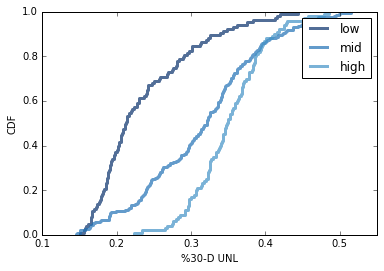

% 30-D Unlimited CDFs for pricehike2


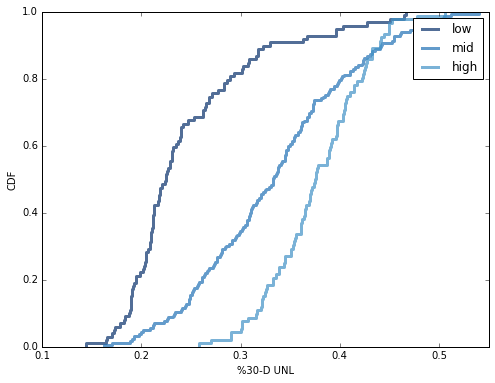

% 30-D Unlimited CDFs for pricehike3


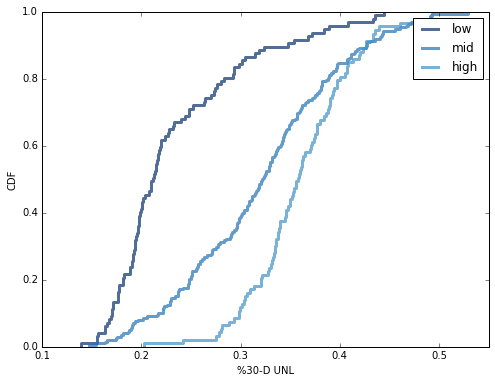

% 30-D Unlimited CDFs for pricehike1


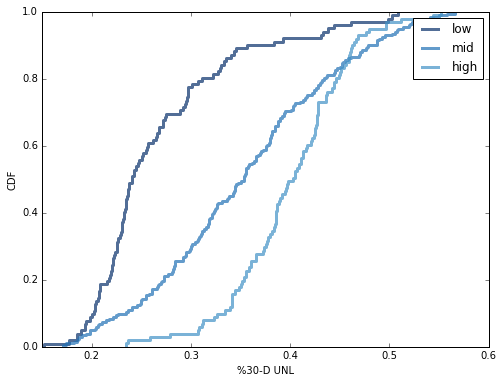

In [73]:
for key, df in df_dictionary.items():
    print('% 30-D Unlimited CDFs for', key)
    bottom_quartile = df['INCOME'].quantile(.25)
    upper_quartile = df['INCOME'].quantile(.75)
    low_income_mask = df['INCOME'] <= bottom_quartile
    middle_income_mask = (df['INCOME'] > bottom_quartile) & (df['INCOME'] <= upper_quartile)
    high_income_mask = df['INCOME'] > upper_quartile
    
    low_income_cdf = thinkstats2.Cdf(df.loc[low_income_mask]['30-D UNL_PCT'], label='low')
    middle_income_cdf = thinkstats2.Cdf(df.loc[middle_income_mask]['30-D UNL_PCT'], label='mid')
    high_income_cdf = thinkstats2.Cdf(df.loc[high_income_mask]['30-D UNL_PCT'], label='high')
    
    thinkplot.PrePlot(3)
    thinkplot.Cdfs([low_income_cdf, middle_income_cdf, high_income_cdf])
    thinkplot.Show(xlabel='%30-D UNL', ylabel='CDF')

### Analysis
The most interesting CDFs are the 7-Day Unlimited and 30-Day Unlimited CDFs. For the 30-Day Unlimited CDF, the distinction between stations by income are apparent. For each time period, 'low-income' stations have far fewer % of 30-Day unlimited cards. As an estimate it seems that at 50% of 'low-income' stations, 30-Day Unlimited cards account for 20% or fewer of total swipes, while at 50% of 'high-income' stations, 30-Day Unlimited cards account for 35% or fewer of total swipes.

On the other hand, it is fascinating to see the 7-Day Unlimited CDFs which show the exact opposite pattern. As an estimate, it seems that at 50% of 'low-income' stations, 7-Day Unlimited cards account for around 30% or less of total swipes while at 'high-income' stations, they account for 15% or less of total swipes.

# CDF Before and After Price Hikes
Instead of dividing by income, this looks at a more broad view and tries to illustrate overall swipe patterns.

### % Full Fare swipes for each time period

<br>pricehike1 - Before Dec 30, 2010 Price Hike
<br>pricehike2 - Before Mar 3, 2013 Price Hike
<br>pricehike3 - Before Mar 22, 2015 Price Hike
<br>pricehike4 - Until today (or next price hike)

In [74]:
price_hike1_cdf = thinkstats2.Cdf(df_dictionary['pricehike1']['FF_PCT'], label='hike1')
price_hike2_cdf = thinkstats2.Cdf(df_dictionary['pricehike2']['FF_PCT'], label='hike2')
price_hike3_cdf = thinkstats2.Cdf(df_dictionary['pricehike3']['FF_PCT'], label='hike3')
price_hike4_cdf = thinkstats2.Cdf(df_dictionary['pricehike4']['FF_PCT'], label='hike4')

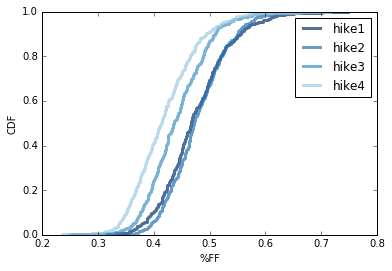

In [75]:
thinkplot.PrePlot(4)
thinkplot.Cdfs([price_hike1_cdf, price_hike2_cdf, price_hike3_cdf, price_hike4_cdf])
thinkplot.Show(xlabel='%FF', ylabel='CDF')

### % 7-Day Unlimited swipes for each time period

<br>pricehike1 - Before Dec 30, 2010 Price Hike
<br>pricehike2 - Before Mar 3, 2013 Price Hike
<br>pricehike3 - Before Mar 22, 2015 Price Hike
<br>pricehike4 - Until today (or next price hike)

In [76]:
price_hike1_cdf = thinkstats2.Cdf(df_dictionary['pricehike1']['7-D UNL_PCT'], label='hike1')
price_hike2_cdf = thinkstats2.Cdf(df_dictionary['pricehike2']['7-D UNL_PCT'], label='hike2')
price_hike3_cdf = thinkstats2.Cdf(df_dictionary['pricehike3']['7-D UNL_PCT'], label='hike3')
price_hike4_cdf = thinkstats2.Cdf(df_dictionary['pricehike4']['7-D UNL_PCT'], label='hike4')

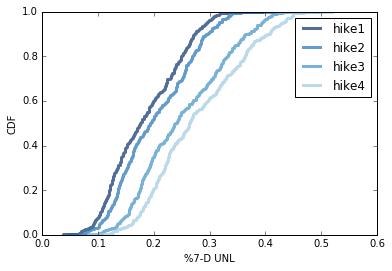

In [77]:
thinkplot.PrePlot(4)
thinkplot.Cdfs([price_hike1_cdf, price_hike2_cdf, price_hike3_cdf, price_hike4_cdf])
thinkplot.Show(xlabel='%7-D UNL', ylabel='CDF')

### % 30-Day Unlimited swipes for each time period

<br>pricehike1 - Before Dec 30, 2010 Price Hike
<br>pricehike2 - Before Mar 3, 2013 Price Hike
<br>pricehike3 - Before Mar 22, 2015 Price Hike
<br>pricehike4 - Until today (or next price hike)

In [78]:
price_hike1_cdf = thinkstats2.Cdf(df_dictionary['pricehike1']['30-D UNL_PCT'], label='hike1')
price_hike2_cdf = thinkstats2.Cdf(df_dictionary['pricehike2']['30-D UNL_PCT'], label='hike2')
price_hike3_cdf = thinkstats2.Cdf(df_dictionary['pricehike3']['30-D UNL_PCT'], label='hike3')
price_hike4_cdf = thinkstats2.Cdf(df_dictionary['pricehike4']['30-D UNL_PCT'], label='hike4')

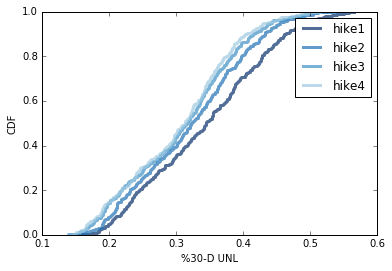

In [79]:
thinkplot.PrePlot(4)
thinkplot.Cdfs([price_hike1_cdf, price_hike2_cdf, price_hike3_cdf, price_hike4_cdf])
thinkplot.Show(xlabel='%30-D UNL', ylabel='CDF')

### Analysis
Again, these CDFs tell an interesting story. Overall, people are using the Full Fare and 30-Day Unlimited cards less and the 7-Day Unlimited cards more. It is very apparent as the CDFs for each time period seem to have shifted towards a particular direction (right for more and left for less usage).


## CDF by ZIP (Borough)
Again but this time by borough. See http://nyc.pediacities.com/New_York_City_ZIP_Codes for more info.

%FF CDFs by borough for pricehike4


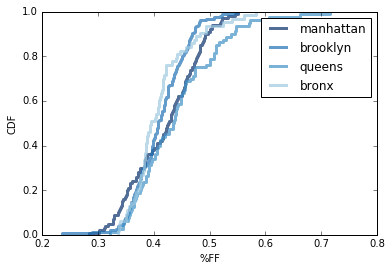

%FF CDFs by borough for pricehike2


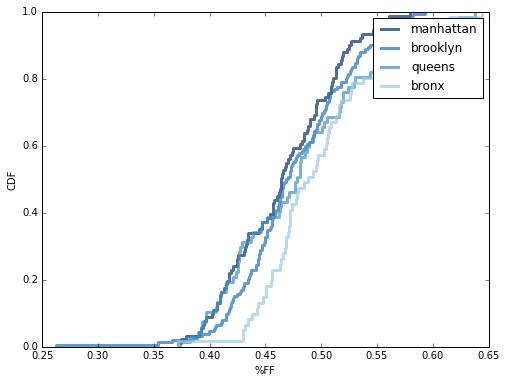

%FF CDFs by borough for pricehike3


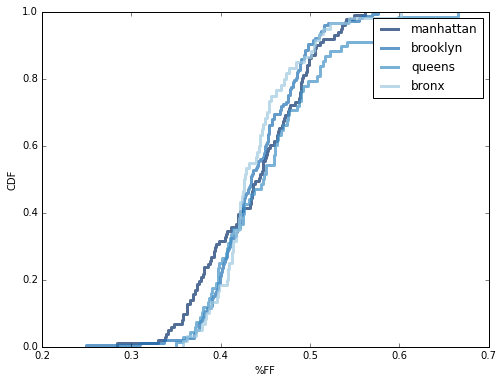

%FF CDFs by borough for pricehike1


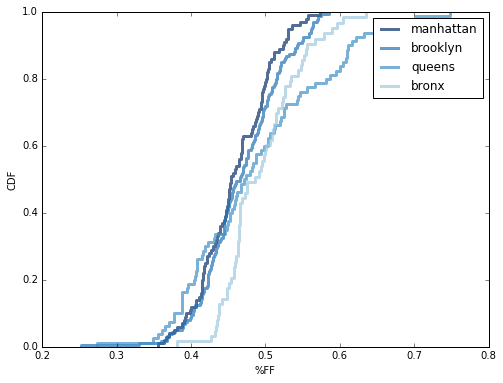

In [80]:
for key, df in df_dictionary.items():
    print('%FF CDFs by borough for', key)
    manhattan_zip_mask = (df['ZIP_CODE'] >= 10001) & (df['ZIP_CODE'] <= 10282)
    brooklyn_zip_mask = (df['ZIP_CODE'] >= 11201) & (df['ZIP_CODE'] <= 11251)
    queens_zip_mask = (df['ZIP_CODE'] >= 11001) & (df['ZIP_CODE'] <= 11109) | (df['ZIP_CODE'] >= 11354) & (df['ZIP_CODE'] <= 11697)
    bronx_zip_mask = (df['ZIP_CODE'] > 10451) & (df['ZIP_CODE'] <= 10475)
    
    manhattan_cdf = thinkstats2.Cdf(df.loc[manhattan_zip_mask]['FF_PCT'], label='manhattan')
    brooklyn_cdf = thinkstats2.Cdf(df.loc[brooklyn_zip_mask]['FF_PCT'], label='brooklyn')
    queens_cdf = thinkstats2.Cdf(df.loc[queens_zip_mask]['FF_PCT'], label='queens')
    bronx_cdf = thinkstats2.Cdf(df.loc[bronx_zip_mask]['FF_PCT'], label='bronx')
    
    thinkplot.PrePlot(4)
    thinkplot.Cdfs([manhattan_cdf, brooklyn_cdf, queens_cdf, bronx_cdf])
    thinkplot.Show(xlabel='%FF', ylabel='CDF')

%7-D Unlimited CDFs by borough for pricehike4


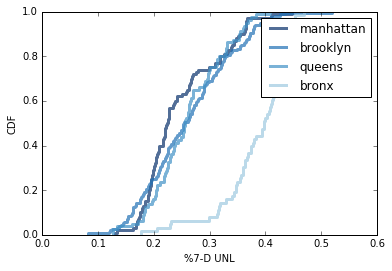

%7-D Unlimited CDFs by borough for pricehike2


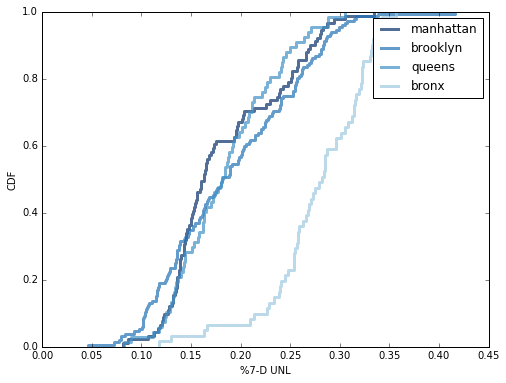

%7-D Unlimited CDFs by borough for pricehike3


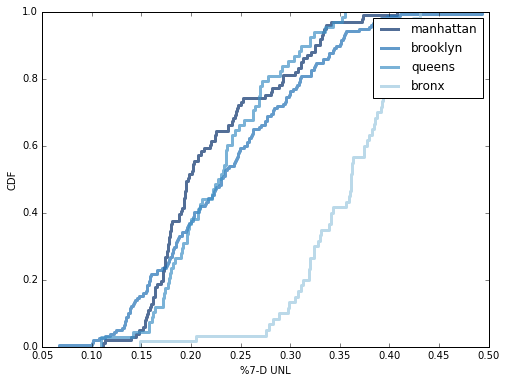

%7-D Unlimited CDFs by borough for pricehike1


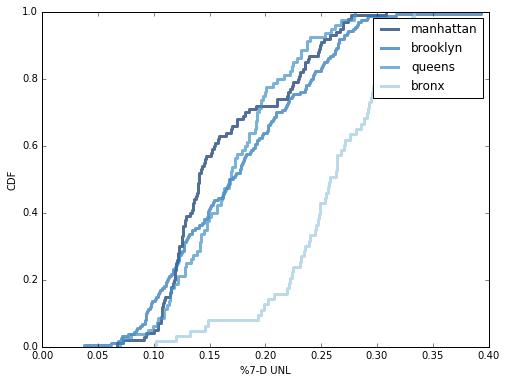

In [81]:
for key, df in df_dictionary.items():
    print('%7-D Unlimited CDFs by borough for', key)
    manhattan_zip_mask = (df['ZIP_CODE'] >= 10001) & (df['ZIP_CODE'] <= 10282)
    brooklyn_zip_mask = (df['ZIP_CODE'] >= 11201) & (df['ZIP_CODE'] <= 11251)
    queens_zip_mask = (df['ZIP_CODE'] >= 11001) & (df['ZIP_CODE'] <= 11109) | (df['ZIP_CODE'] >= 11354) & (df['ZIP_CODE'] <= 11697)
    bronx_zip_mask = (df['ZIP_CODE'] > 10451) & (df['ZIP_CODE'] <= 10475)
    
    manhattan_cdf = thinkstats2.Cdf(df.loc[manhattan_zip_mask]['7-D UNL_PCT'], label='manhattan')
    brooklyn_cdf = thinkstats2.Cdf(df.loc[brooklyn_zip_mask]['7-D UNL_PCT'], label='brooklyn')
    queens_cdf = thinkstats2.Cdf(df.loc[queens_zip_mask]['7-D UNL_PCT'], label='queens')
    bronx_cdf = thinkstats2.Cdf(df.loc[bronx_zip_mask]['7-D UNL_PCT'], label='bronx')
    
    thinkplot.PrePlot(4)
    thinkplot.Cdfs([manhattan_cdf, brooklyn_cdf, queens_cdf, bronx_cdf])
    thinkplot.Show(xlabel='%7-D UNL', ylabel='CDF')

%30-D Unlimited CDFs by borough for pricehike4


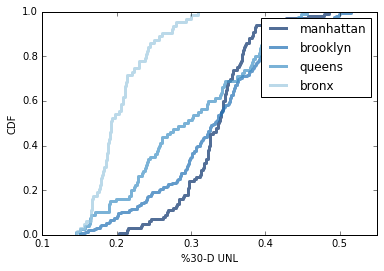

%30-D Unlimited CDFs by borough for pricehike2


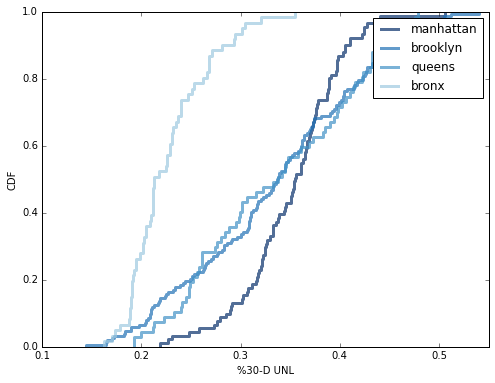

%30-D Unlimited CDFs by borough for pricehike3


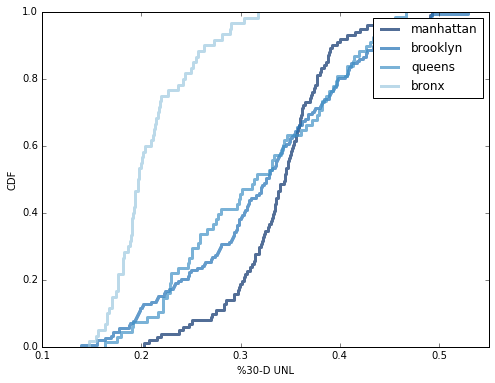

%30-D Unlimited CDFs by borough for pricehike1


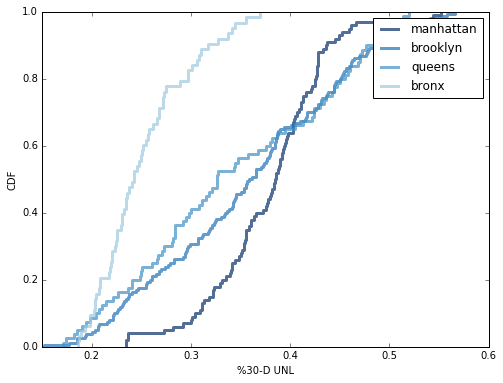

In [82]:
for key, df in df_dictionary.items():
    print('%30-D Unlimited CDFs by borough for', key)
    manhattan_zip_mask = (df['ZIP_CODE'] >= 10001) & (df['ZIP_CODE'] <= 10282)
    brooklyn_zip_mask = (df['ZIP_CODE'] >= 11201) & (df['ZIP_CODE'] <= 11251)
    queens_zip_mask = (df['ZIP_CODE'] >= 11001) & (df['ZIP_CODE'] <= 11109) | (df['ZIP_CODE'] >= 11354) & (df['ZIP_CODE'] <= 11697)
    bronx_zip_mask = (df['ZIP_CODE'] > 10451) & (df['ZIP_CODE'] <= 10475)
    
    manhattan_cdf = thinkstats2.Cdf(df.loc[manhattan_zip_mask]['30-D UNL_PCT'], label='manhattan')
    brooklyn_cdf = thinkstats2.Cdf(df.loc[brooklyn_zip_mask]['30-D UNL_PCT'], label='brooklyn')
    queens_cdf = thinkstats2.Cdf(df.loc[queens_zip_mask]['30-D UNL_PCT'], label='queens')
    bronx_cdf = thinkstats2.Cdf(df.loc[bronx_zip_mask]['30-D UNL_PCT'], label='bronx')
    
    thinkplot.PrePlot(4)
    thinkplot.Cdfs([manhattan_cdf, brooklyn_cdf, queens_cdf, bronx_cdf])
    thinkplot.Show(xlabel='%30-D UNL', ylabel='CDF')

### Analysis
Yet again, it is the 7-Day Unlimited and 30-Day Unlimited card CDFs that tell us the most information when it is divided by boroughs. As before, the Full Fare CDFs are similar and the lines overlap each other at many points. Maybe if we looked more closely, we could deduce some information.

However, what is obvious is the fact that people in the Bronx rely on the 7-Day Unlimited far more than the 30-Day Unlimited card. While the other 3 boroughs follow a similar line, the Bronx CDF is far left for the 30-Day and far right for the 7-Day.

# Models
## Exponential Distribution?
Complementary CDF of %30-D UNL at 'low-income' stations. Not exactly a straight line, especially towards the tail.

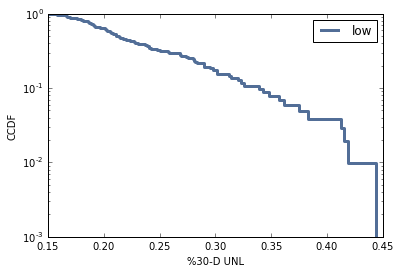

In [83]:
df = df_dictionary['pricehike4']
bottom_quartile = df['INCOME'].quantile(.25)
low_income_mask = df['INCOME'] <= bottom_quartile

low_income_cdf = thinkstats2.Cdf(df.loc[low_income_mask]['30-D UNL_PCT'], label='low')

thinkplot.Cdf(low_income_cdf, complement=True)
thinkplot.Show(xlabel='%30-D UNL', ylabel='CCDF',yscale='log')

## Pareto Distribution?
Same data as before but different model. Definitely does not fit well.

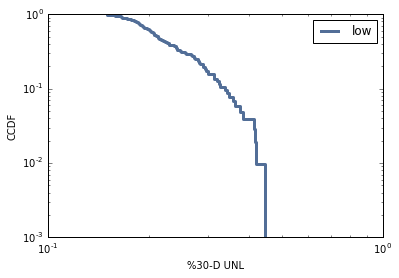

In [84]:
thinkplot.Cdf(low_income_cdf, complement=True)
thinkplot.Show(xlabel='%30-D UNL', ylabel='CCDF', xscale='log', yscale='log')

## Normal Probability Plot
Seems like the normal distribution is a good fit for %FF swipes at a station for the most part.
Very straight line for +/- 2 std (95% of data).

In [85]:
def MakeNormalPlot(series):
    mean = series.mean()
    std = series.std()
    
    xs = [-4, 4]
    fxs, fys = thinkstats2.FitLine(xs, inter=mean, slope=std)
    thinkplot.Plot(fxs, fys, color='gray', label='model')
    
    xs, ys= thinkstats2.NormalProbability(series)
    thinkplot.Plot(xs, ys, label='%FF')

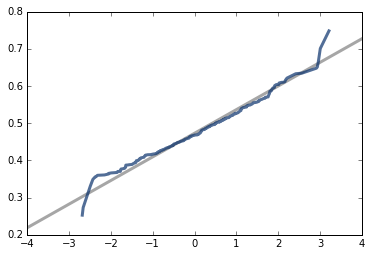

In [86]:
MakeNormalPlot(df_dictionary['pricehike1']['FF_PCT'])

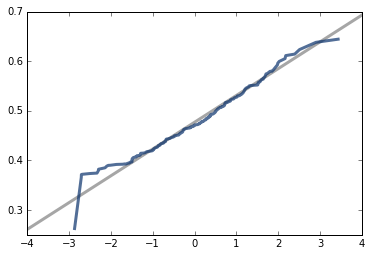

In [87]:
MakeNormalPlot(df_dictionary['pricehike2']['FF_PCT'])

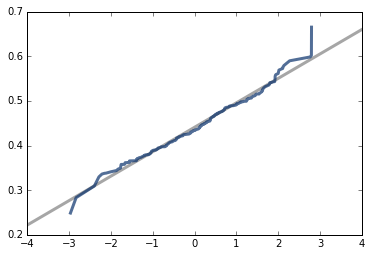

In [88]:
MakeNormalPlot(df_dictionary['pricehike3']['FF_PCT'])

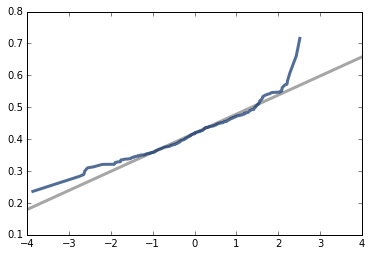

In [89]:
MakeNormalPlot(df_dictionary['pricehike4']['FF_PCT'])

# Final Observations and Future Work
In conclusion, it seems like there is a shift towards the use of the 7-Day Unlimited MetroCard and less use of the 30-Day Unlimited MetroCard as the MTA keeps increasing prices. Furthermore, there is a definitive distinction when dividing the data by income levels.

Obviously, the assumptions I have made have to be taken into account. Moreover, if I were to explore further, I would look at the government issued cards (like student MetroCards and other forms of welfare cards).

Lastly, I would like to be able to visualize the data better. Ideally, it would be in the form of a map where you can filter information you're looking for and it would show a dynamically generated heatmap.